In [3]:
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('placement.csv')
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [5]:
#new_df = df.loc[:,['Age','Fare']]

Text(0, 0.5, 'package')

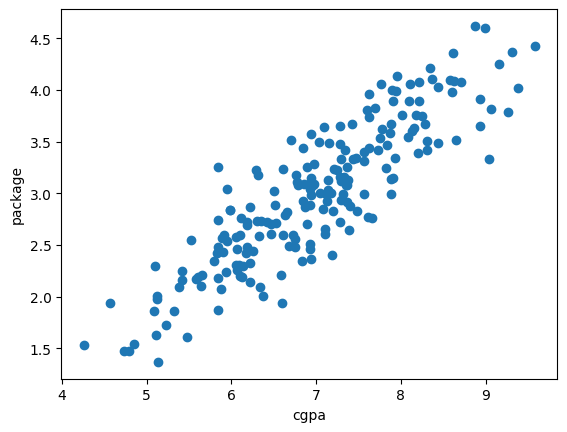

In [6]:
plt.scatter(df['cgpa'], df['package'])
plt.xlabel('cgpa')
plt.ylabel('package')

In [7]:
X = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [12]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [13]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train,y_train)

LinearRegression()

In [14]:
import pickle

with open('linear.pkl', 'wb') as f:
    pickle.dump(lr, f)

In [15]:
import pickle
# Load the scikit-learn model from the pickle file
with open('linear.pkl', 'rb') as f:
    model = pickle.load(f)


In [16]:
X_test.head()

,cgpa
112,8.58
29,7.15
182,5.88
199,6.22
193,4.57


In [17]:
y_test.head()

112    4.10
29     3.49
182    2.08
199    2.33
193    1.94
Name: package, dtype: float64

In [18]:
lr.predict(X_test.iloc[0].values.reshape(-1,1))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.89111601])

In [19]:
lr.predict([[5]])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1.89364794])

In [20]:
import joblib
from flask import Flask, request, jsonify
from flask_cors import CORS

In [52]:
app = Flask(__name__)
CORS(app)

# Load the .pkl model file
model = joblib.load('linear.pkl')

@app.route('/predict', methods=['POST'])
def predict():
    # Get input data from the HTTP request
    data = request.get_json()
    dt =  int(data['x'])
    # Use the loaded model to make predictions
    prediction = model.predict([[dt]])

    # Return the prediction as a JSON response
    return jsonify({'y': prediction[0]})

if __name__ == '__main__':
    app.run(port=5000)

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [10/Mar/2023 17:39:17] "OPTIONS /predict HTTP/1.1" 200 -
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
127.0.0.1 - - [10/Mar/2023 17:39:17] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [10/Mar/2023 17:39:23] "OPTIONS /predict HTTP/1.1" 200 -
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
127.0.0.1 - - [10/Mar/2023 17:39:23] "POST /predict HTTP/1.1" 200 -
